# Grimacing Face emoji and Bruxism 😬 : Analysis

In [82]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
from scipy.stats import ttest_ind, shapiro, wilcoxon, mannwhitneyu, chi2_contingency
from copy import copy
import pdb
from scipy.stats.contingency import association

palette_color = sns.color_palette('colorblind')

## Loading data


In [ ]:
df = pd.read_csv("full_data.tsv", sep="\t")

In [85]:
len(df)

261

In [88]:
def make_simple_pie(variable_name, plot_title):

    counts = Counter(df[variable_name])
    plt.pie(counts.values(), labels=counts.keys(), colors=palette_color, textprops={'fontsize':15})
    plt.title(plot_title, fontsize=18)
    plt.show()
    
    
    total_count = sum(counts.values())
    for k, count in counts.items():
        print(k, count, "(" + str(np.round((count/total_count)*100, 2)) + "%)")


## General demographics of respondents

### Gender

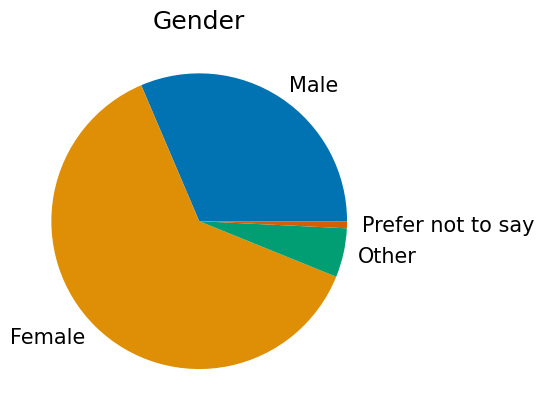

Male 82 (31.42%)
Female 163 (62.45%)
Other 14 (5.36%)
Prefer not to say 2 (0.77%)


In [89]:
make_simple_pie(variable_name="Gender", plot_title="Gender")

### Country of origin 


In [90]:
countryorigin_pcounts = Counter(df['Country of origin'])
countryresidence_pcounts = Counter(df['Country of residence'])

# assign countries to colors
all_countries = set(list(countryorigin_pcounts.keys()) + list(countryresidence_pcounts.keys()))
all_countries = sorted(list(all_countries))

countryorigin_counts = {country:countryorigin_pcounts[country] for country in all_countries if country in countryorigin_pcounts}
countryresidence_counts = {country:countryresidence_pcounts[country] for country in all_countries if country in countryresidence_pcounts}

Counter(df['Country of origin'])

colors_for_countries = sns.color_palette("hls", len(all_countries))
country_color_dict = {country:color for country, color in zip(all_countries, colors_for_countries)}


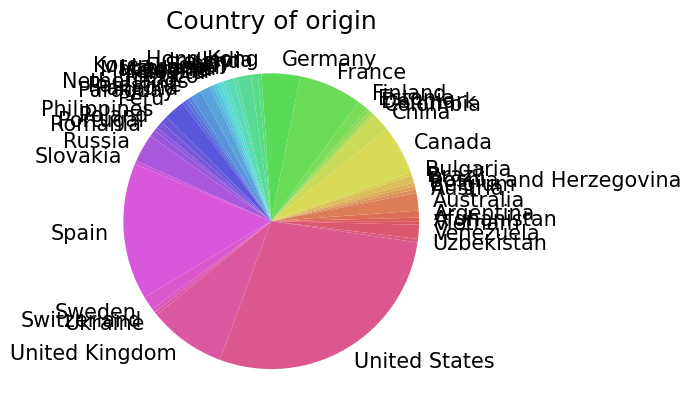

Total number of different countries of origin: 47
United States 74 (28.35%)
Spain 39 (14.94%)
United Kingdom 22 (8.43%)
France 18 (6.9%)
Canada 14 (5.36%)
Germany 11 (4.21%)
Russia 8 (3.07%)
Peru 6 (2.3%)
Australia 5 (1.92%)
China 5 (1.92%)
Ireland 4 (1.53%)
Sweden 4 (1.53%)
Venezuela 4 (1.53%)
Finland 3 (1.15%)
Mexico 3 (1.15%)
Netherlands 3 (1.15%)
Argentina 2 (0.77%)
Brazil 2 (0.77%)
India 2 (0.77%)
Korea, South 2 (0.77%)
Philippines 2 (0.77%)
Poland 2 (0.77%)
Romania 2 (0.77%)
Afghanistan 1 (0.38%)
Austria 1 (0.38%)
Belgium 1 (0.38%)
Bosnia and Herzegovina 1 (0.38%)
Bulgaria 1 (0.38%)
Colombia 1 (0.38%)
Denmark 1 (0.38%)
Estonia 1 (0.38%)
Hong Kong 1 (0.38%)
Italy 1 (0.38%)
Lebanon 1 (0.38%)
Lithuania 1 (0.38%)
Macedonia 1 (0.38%)
Malaysia 1 (0.38%)
Malta 1 (0.38%)
Palestine 1 (0.38%)
Panama 1 (0.38%)
Paraguay 1 (0.38%)
Portugal 1 (0.38%)
Slovakia 1 (0.38%)
Switzerland 1 (0.38%)
Ukraine 1 (0.38%)
Uzbekistan 1 (0.38%)
Vietnam 1 (0.38%)


In [91]:

plt.pie(countryorigin_counts.values(), labels=countryorigin_counts.keys(), colors=[country_color_dict[c] for c in countryorigin_counts.keys()], textprops={'fontsize':15})
plt.title("Country of origin", fontsize=18)
plt.show()

sorted_countryorigins = sorted(countryorigin_counts.items(), key=lambda x:x[1], reverse=True)

total_count = sum(countryorigin_counts.values())
print("Total number of different countries of origin:", len(countryorigin_counts))

for country, count in sorted_countryorigins:
    print(country, count, "(" + str(np.round((count/total_count)*100, 2)) + "%)")



### Country of residence

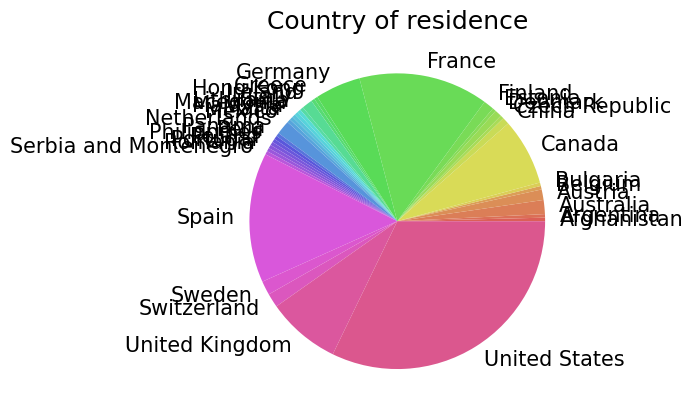

Total number of different countries of residence: 36
United States 84 (32.18%)
France 37 (14.18%)
Spain 37 (14.18%)
United Kingdom 21 (8.05%)
Canada 19 (7.28%)
Germany 13 (4.98%)
Australia 4 (1.53%)
Netherlands 4 (1.53%)
Sweden 4 (1.53%)
Switzerland 4 (1.53%)
Austria 3 (1.15%)
Finland 3 (1.15%)
Ireland 3 (1.15%)
China 2 (0.77%)
Denmark 2 (0.77%)
Afghanistan 1 (0.38%)
Argentina 1 (0.38%)
Belgium 1 (0.38%)
Bulgaria 1 (0.38%)
Czech Republic 1 (0.38%)
Estonia 1 (0.38%)
Greece 1 (0.38%)
Hong Kong 1 (0.38%)
Italy 1 (0.38%)
Lithuania 1 (0.38%)
Macedonia 1 (0.38%)
Malaysia 1 (0.38%)
Malta 1 (0.38%)
Mexico 1 (0.38%)
Panama 1 (0.38%)
Peru 1 (0.38%)
Philippines 1 (0.38%)
Poland 1 (0.38%)
Portugal 1 (0.38%)
Romania 1 (0.38%)
Serbia and Montenegro 1 (0.38%)


In [92]:

plt.pie(countryresidence_counts.values(), labels=countryresidence_counts.keys(), colors=[country_color_dict[c] for c in countryresidence_counts.keys()], textprops={'fontsize':15})
plt.title("Country of residence", fontsize=18)
plt.show()


sorted_countryresidence = sorted(countryresidence_counts.items(), key=lambda x:x[1], reverse=True)

total_count = sum(countryresidence_counts.values())
print("Total number of different countries of residence:", len(countryresidence_counts))

for country, count in sorted_countryresidence:
    print(country, count, "(" + str(np.round((count/total_count)*100, 2)) + "%)")


### Age

lowest age: 18
mean age: 31.444444444444443
highest age: 69


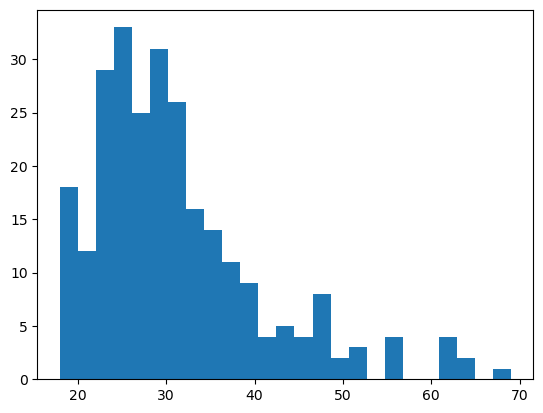

In [93]:
plt.hist(df['Age'], bins=25)
print("lowest age:", int(df['Age'].min()))
print("mean age:", df['Age'].mean())
print("highest age:", int(df['Age'].max()))
      

## Simple statistics (individual variables of interest)

### Been told that they have bruxism

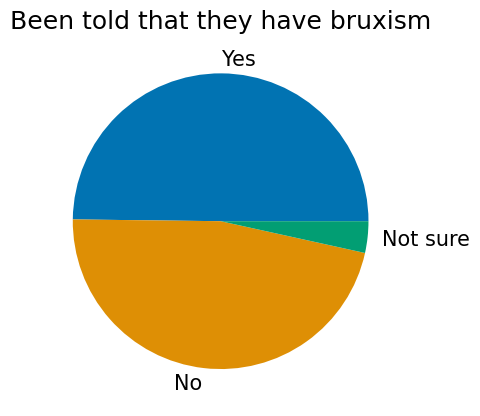

Yes 130 (49.81%)
No 122 (46.74%)
Not sure 9 (3.45%)


In [94]:
# Original question: #'Have you ever been told by a healthcare professional that you have bruxism? \n(If your response is more complicated that yes/no/unsure, please elaborate using the 4th option)'
variable_name = "bruxism_professional"
make_simple_pie(variable_name, plot_title="Been told that they have bruxism")


### They think they have bruxism

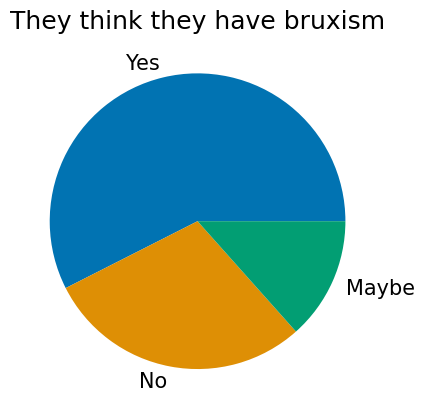

Yes 150 (57.47%)
No 76 (29.12%)
Maybe 35 (13.41%)


In [95]:
# Original question: 'Regardless of your previous answer, do you think you may have bruxism? (for example, has anyone told you that you grind your teeth at night? Are you ever aware of grinding or clenching your teeth during the day? Other signs include worn teeth and tired or tight jaw muscles).'
variable_name = "bruxism_personal"
make_simple_pie(variable_name, plot_title="They think they have bruxism")

### Have been diagnosed with TMJ

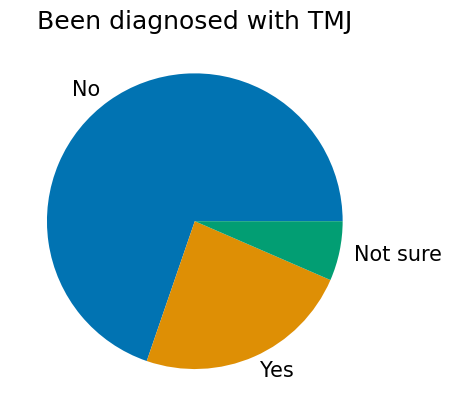

No 182 (69.73%)
Yes 62 (23.75%)
Not sure 17 (6.51%)


In [96]:
# Original question: 'Have you ever been diagnosed with a TMJ disorder by a healthcare professional?'
variable_name = "TMJ_professional" 
make_simple_pie(variable_name, plot_title="Been diagnosed with TMJ")

### They think they have TMJ

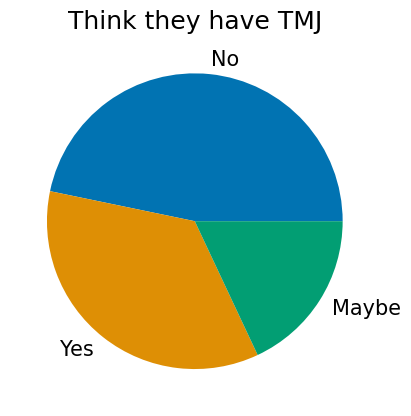

No 122 (46.74%)
Yes 92 (35.25%)
Maybe 47 (18.01%)


In [97]:
# Original question: #"Regardless of your previous answer, do you think you may have a TMJ disorder? (for example, you experience some of the following: jaw pain, a difficulty to open your mouth wide, clicking or popping sounds when opening or closing your mouth, or your jaw locks in some positions)."
variable_name = "TMJ_personal" 
make_simple_pie(variable_name, plot_title="Think they have TMJ")

### Sentiment linked to 😬

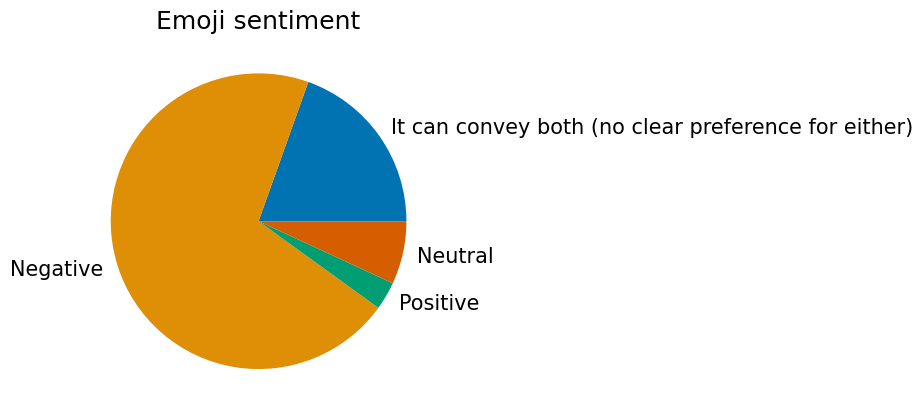

It can convey both (no clear preference for either) 51 (19.54%)
Negative 184 (70.5%)
Positive 8 (3.07%)
Neutral 18 (6.9%)


In [98]:
# Original question: #"In your opinion (and according to how you use or would use this emoji), does the grimacing face emoji 😬 convey a positive or a negative emotion?"
variable_name = "Emoji_Emotion" 
make_simple_pie(variable_name, "Emoji sentiment")

### Perceived emoji use (compared to other people)

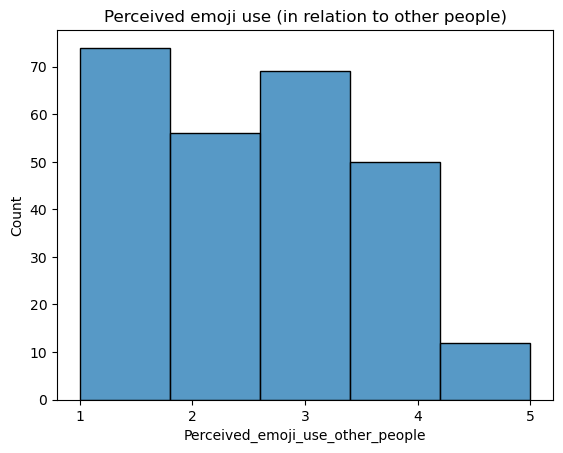

mean 2.5019
std 1.2173


In [99]:
# Original question: #"Perceived emoji use (in relation to other people)\nCompared to other people that you see, read or interact with online, would you say that you use the grimacing face 😬 emoji more often than other people? \nPlease give a number in a scale from 1 (far less than average) to 5 (far more than average). A score of 3 indicates that your use of 😬 is not clearly lower or higher than that of the average person you interact with."
variable_name = "Perceived_emoji_use_other_people"

sns.histplot(df, x=variable_name, bins=5)
plt.xticks([1,2,3,4,5])
plt.title("Perceived emoji use (in relation to other people)")
plt.show()

print("mean", np.round(df[variable_name].mean(), 4))
print("std", np.round(df[variable_name].std(), 4))


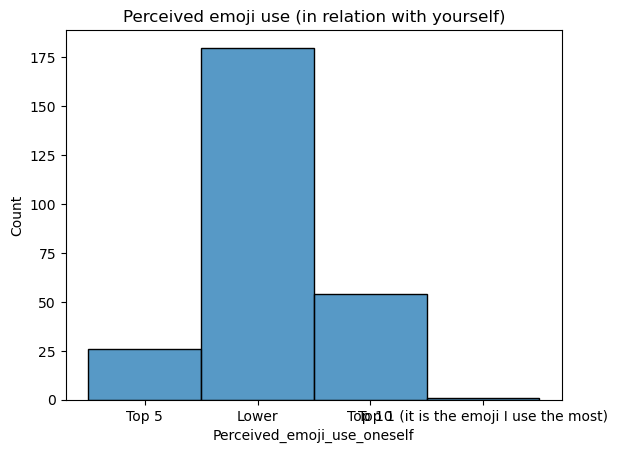

In [100]:
# Original question: "Perceived emoji use (in relation with yourself)\nWith respect to your own emoji use, would you say that the grimacing face 😬 emoji is one of the emojis you use the most?"

variable_name = "Perceived_emoji_use_oneself"

sns.histplot(df, x=variable_name, bins=len(df[variable_name].unique()))

plt.title("Perceived emoji use (in relation with yourself)")
plt.show()

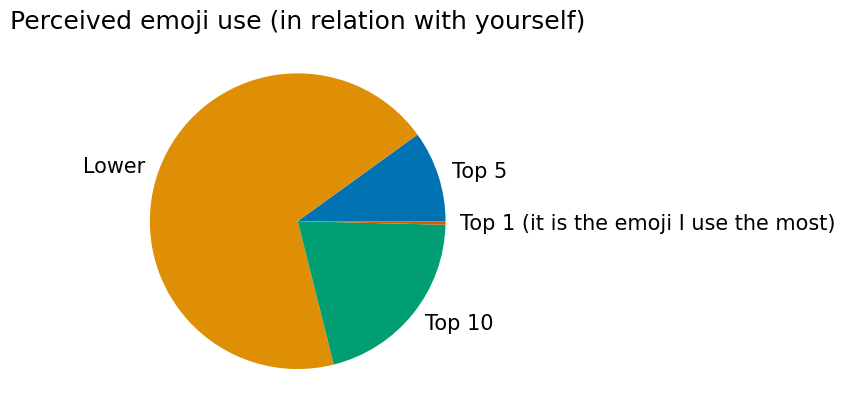

Top 5 26 (9.96%)
Lower 180 (68.97%)
Top 10 54 (20.69%)
Top 1 (it is the emoji I use the most) 1 (0.38%)


In [101]:
make_simple_pie("Perceived_emoji_use_oneself", "Perceived emoji use (in relation with yourself)")

### Recorded emoji use

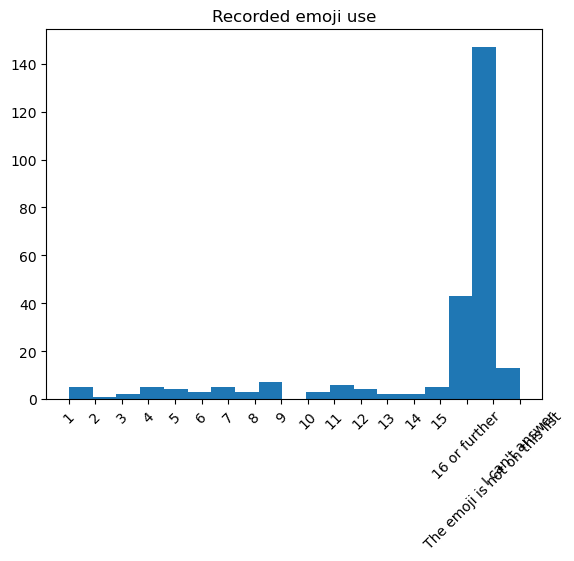

In [102]:
# Original question: Most smartphones keep track of your recently used emojis. Please go to the instant messaging app you use the most and check the list of most recently used emojis. What position does the grimacing face 😬 emoji occupy on this list? (if it is not there please select \"The emoji is not on this list\")  If you can not do this at the moment or you do not know how to do it, please select \"I can't answer\".  Please, answer only if you have a smartphone that you use regularly and that has not been used by someone else recently.

variable_name = "Recorded_emoji_use"

sorted_options = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16 or further', 'The emoji is not on this list', "I can't answer"]

c = Counter(df[variable_name])

sorted_vals = []
for k in sorted_options:
    sorted_vals.extend([k]*c[k])

plt.hist(sorted_vals, bins=len(df[variable_name].unique()))


plt.xticks(rotation=45)

plt.title("Recorded emoji use")
plt.show()

### Bruxism and TMJD incidence

In [103]:
import seaborn as sns
from collections import Counter

def disorder_incidence(variable_names, plot_title):
    count_dict = dict()
    for var in variable_names:
        counts = Counter(df[var])
        count_dict[var] = counts
    return count_dict

result = disorder_incidence(["bruxism_professional","bruxism_personal","TMJ_professional","TMJ_personal"], "title")
      

In [104]:
result

{'bruxism_professional': Counter({'Yes': 130, 'No': 122, 'Not sure': 9}),
 'bruxism_personal': Counter({'Yes': 150, 'No': 76, 'Maybe': 35}),
 'TMJ_professional': Counter({'No': 182, 'Yes': 62, 'Not sure': 17}),
 'TMJ_personal': Counter({'No': 122, 'Yes': 92, 'Maybe': 47})}

## Associations and tests

In [105]:
def intersection_two_categorical(v1, v2):
    print("****", v2, "and", v1, "****")

    for answer in df[v2].unique():
        print(answer)
        data_this_answer = [ins[v1] for i, ins in df.iterrows() if ins[v2] == answer]
        data_this_answer_c = Counter(data_this_answer)
        data_this_answer_p = {k:np.round(data_this_answer_c[k]/sum(data_this_answer_c.values())*100, 2) for k in data_this_answer_c}
        print(data_this_answer_c)
        print()


### Bruxism/TMJ answers by gender

In [106]:
intersection_two_categorical("Gender", "bruxism_professional")
intersection_two_categorical("Gender", "bruxism_personal")
intersection_two_categorical("Gender", "TMJ_professional")
intersection_two_categorical("Gender", "TMJ_personal")

**** bruxism_professional and Gender ****
Yes
Counter({'Female': 90, 'Male': 34, 'Other': 4, 'Prefer not to say': 2})

No
Counter({'Female': 68, 'Male': 44, 'Other': 10})

Not sure
Counter({'Female': 5, 'Male': 4})

**** bruxism_personal and Gender ****
Yes
Counter({'Female': 100, 'Male': 41, 'Other': 7, 'Prefer not to say': 2})

No
Counter({'Female': 45, 'Male': 28, 'Other': 3})

Maybe
Counter({'Female': 18, 'Male': 13, 'Other': 4})

**** TMJ_professional and Gender ****
No
Counter({'Female': 107, 'Male': 64, 'Other': 11})

Yes
Counter({'Female': 47, 'Male': 10, 'Other': 3, 'Prefer not to say': 2})

Not sure
Counter({'Female': 9, 'Male': 8})

**** TMJ_personal and Gender ****
No
Counter({'Female': 75, 'Male': 40, 'Other': 7})

Yes
Counter({'Female': 65, 'Male': 22, 'Other': 3, 'Prefer not to say': 2})

Maybe
Counter({'Female': 23, 'Male': 20, 'Other': 4})



### Age and bruxism/TMJD

In [107]:
def intersection_categorical_numerical(v1, v2):

    answer_by_age = df.groupby([v2])

    print("Average age by response")
    print(answer_by_age[v1].mean())
    print()
    print("Standard deviation of age by response")
    print(answer_by_age[v1].std())
    #print()
    #print("Number of times the response was chosen")
    #print(answer_by_age[v1].count())

    groups = {g[0][0]:g[1][v1] for g in answer_by_age}
    
    return groups


In [108]:
variable_name = "Age" #"How old are you? Please enter your age in digits:"
variable_name2 = "bruxism_professional" #"In your opinion (and according to how you use or would use this emoji), does the grimacing face emoji 😬 convey a positive or a negative emotion?"


groups = intersection_categorical_numerical(variable_name, variable_name2)

Average age by response
bruxism_professional
No          28.434426
Not sure    30.111111
Yes         34.361538
Name: Age, dtype: float64

Standard deviation of age by response
bruxism_professional
No           7.507558
Not sure     6.863753
Yes         10.690142
Name: Age, dtype: float64


In [109]:
variable_name = "Age" #"How old are you? Please enter your age in digits:"
variable_name2 = "bruxism_personal" #"In your opinion (and according to how you use or would use this emoji), does the grimacing face emoji 😬 convey a positive or a negative emotion?"

groups = intersection_categorical_numerical(variable_name, variable_name2)

Average age by response
bruxism_personal
Maybe    30.342857
No       27.776316
Yes      33.560000
Name: Age, dtype: float64

Standard deviation of age by response
bruxism_personal
Maybe     9.719425
No        7.583489
Yes      10.001664
Name: Age, dtype: float64


In [110]:
variable_name = "Age" #"How old are you? Please enter your age in digits:"
variable_name2 = "TMJ_professional" #"In your opinion (and according to how you use or would use this emoji), does the grimacing face emoji 😬 convey a positive or a negative emotion?"

groups = intersection_categorical_numerical(variable_name, variable_name2)


Average age by response
TMJ_professional
No          30.093407
Not sure    34.117647
Yes         34.677419
Name: Age, dtype: float64

Standard deviation of age by response
TMJ_professional
No           8.862177
Not sure     7.025688
Yes         11.494509
Name: Age, dtype: float64


In [111]:
variable_name = "Age" #"How old are you? Please enter your age in digits:"
variable_name2 = "TMJ_personal" #"In your opinion (and according to how you use or would use this emoji), does the grimacing face emoji 😬 convey a positive or a negative emotion?"

groups = intersection_categorical_numerical(variable_name, variable_name2)


Average age by response
TMJ_personal
Maybe    34.212766
No       29.131148
Yes      33.097826
Name: Age, dtype: float64

Standard deviation of age by response
TMJ_personal
Maybe    11.583227
No        8.199930
Yes       9.718069
Name: Age, dtype: float64


### Age and emotion associated to the emoji



Are younger people more likely to say it can be positive?

First, check the mean age of each response. Run a test to compare the means.

In [112]:
variable_name = "Age" #"How old are you? Please enter your age in digits:"
variable_name2 = "Emoji_Emotion" #"In your opinion (and according to how you use or would use this emoji), does the grimacing face emoji 😬 convey a positive or a negative emotion?"

groups = intersection_categorical_numerical(variable_name, variable_name2)

Average age by response
Emoji_Emotion
It can convey both (no clear preference for either)    32.117647
Negative                                               31.076087
Neutral                                                31.166667
Positive                                               36.250000
Name: Age, dtype: float64

Standard deviation of age by response
Emoji_Emotion
It can convey both (no clear preference for either)     8.749050
Negative                                               10.004626
Neutral                                                 3.988955
Positive                                               14.723645
Name: Age, dtype: float64


In [113]:
# check normality
print(shapiro(groups['Negative']))
print(shapiro(groups['It can convey both (no clear preference for either)']))

print(ttest_ind(groups['Negative'], groups['It can convey both (no clear preference for either)']))
print(mannwhitneyu(groups['Negative'], groups['It can convey both (no clear preference for either)']))

ShapiroResult(statistic=0.8869174718856812, pvalue=1.4157383598778495e-10)
ShapiroResult(statistic=0.9203965663909912, pvalue=0.0021733371540904045)
TtestResult(statistic=-0.6751372703818744, pvalue=0.5002579754477028, df=233.0)
MannwhitneyuResult(statistic=4145.0, pvalue=0.2028938372353296)


Text(0.5, 1.0, 'Age distribution of respondents associating the emoji with a negative emotion')

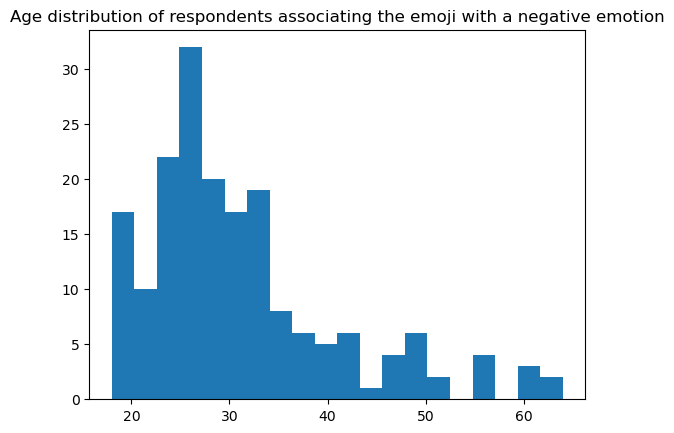

In [114]:
plt.hist(groups['Negative'], bins=20)
plt.title("Age distribution of respondents associating the emoji with a negative emotion")

Text(0.5, 1.0, 'Age distribution of respondents associating the emoji with a positive emotion')

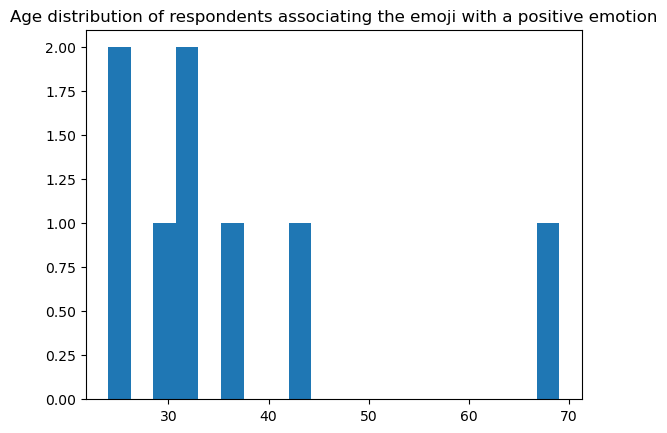

In [115]:
plt.hist(groups['Positive'], bins=20)
plt.title("Age distribution of respondents associating the emoji with a positive emotion")

In [116]:

def assign_age_interval(age, intervals):
    for interval in intervals:
        if age >= interval[0] and age <= interval[1]:
            return interval

age_intervals = [(0, 9), (10,14),(15,19),(20,24),(25,29),(31,35),(36, 40),(41,50),(51,60),(60,10000)]

d = []
for i, r in df.iterrows():
    interval = assign_age_interval(r[variable_name], age_intervals)
    d.append({'age':interval, 'sentiment':r[variable_name2]})
    



# Verifying hypotheses: Bruxism/TMJD and emoji use

In [117]:
def report_statistics(emoji_variable, bruxism_variable):
   
    emojiuse_by_bruxism = df.groupby([bruxism_variable])
    print("Mean:")
    print(emojiuse_by_bruxism[emoji_variable].mean())
    print()
    print("Count:")
    print(emojiuse_by_bruxism[emoji_variable].count())
    print()
    print("Standard deviation:")
    print(emojiuse_by_bruxism[emoji_variable].std())
    print()
    
    groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_bruxism}
    
    # Mean, std and counts of the yes+not sure category
    unsure_variable_name = "Maybe" if "Maybe" in groups else "Not sure"
    print("Yes + " + unsure_variable_name + ":")
    print("Mean:", np.concatenate([groups['Yes'].values, groups[unsure_variable_name].values]).mean())
    print("Standard deviation:", np.concatenate([groups['Yes'].values, groups[unsure_variable_name].values]).std())
    print("Count:", np.concatenate([groups['Yes'].values, groups[unsure_variable_name].values]).shape[0])

    
    return emojiuse_by_bruxism, groups

def normality_tests(grouped_data):
    unsure_variable_name = "Maybe" if "Maybe" in grouped_data else "Not sure"
    print("Normality tests:")
    print("'No':", shapiro(grouped_data['No']))
    print("'Yes':", shapiro(grouped_data['Yes']))
    print("'Yes + Maybe':", shapiro(np.concatenate([grouped_data['Yes'].values, grouped_data[unsure_variable_name].values])))
    
    
    
def significance_tests(grouped_data, normality=True):
    unsure_variable_name = "Maybe" if "Maybe" in grouped_data else "Not sure"    

    if normality:
        test = ttest_ind
    else:
        test = mannwhitneyu
        
    print("*** Significance tests ***")
    print("Yes vs No:")
    print(test(groups['No'], groups['Yes']))
    

    print("Yes+Maybe vs No:")
    print(test(groups['No'],np.concatenate([groups['Yes'].values, groups[unsure_variable_name].values])))
    

    

## Self-reported emoji use compared to others & Bruxism/TMJD


### Self-reported emoji use compared to others & Bruxism_professional

#### Statistics

In [118]:
emoji_variable = "Perceived_emoji_use_other_people" #"Perceived emoji use (in relation to other people)\nCompared to other people that you see, read or interact with online, would you say that you use the grimacing face 😬 emoji more often than other people? \nPlease give a number in a scale from 1 (far less than average) to 5 (far more than average). A score of 3 indicates that your use of 😬 is not clearly lower or higher than that of the average person you interact with."
bruxism_variable = "bruxism_professional" #"Have you ever been told by a healthcare professional that you have bruxism? \n(If your response is more complicated that yes/no/unsure, please elaborate using the 4th option)"
emojiuse_by_bruxismpro, groups = report_statistics(emoji_variable, bruxism_variable)

Mean:
bruxism_professional
No          2.360656
Not sure    2.111111
Yes         2.661538
Name: Perceived_emoji_use_other_people, dtype: float64

Count:
bruxism_professional
No          122
Not sure      9
Yes         130
Name: Perceived_emoji_use_other_people, dtype: int64

Standard deviation:
bruxism_professional
No          1.143184
Not sure    1.166667
Yes         1.273181
Name: Perceived_emoji_use_other_people, dtype: float64

Yes + Not sure:
Mean: 2.6258992805755397
Standard deviation: 1.265328355001462
Count: 139


#### Significance tests

In [119]:
normality_tests(groups)

Normality tests:
'No': ShapiroResult(statistic=0.8707284927368164, pvalue=6.573692701294931e-09)
'Yes': ShapiroResult(statistic=0.8938269019126892, pvalue=3.689399719064568e-08)
'Yes + Maybe': ShapiroResult(statistic=0.8922821283340454, pvalue=1.3326868497642863e-08)


In [120]:
significance_tests(groups, normality=True)  

*** Significance tests ***
Yes vs No:
TtestResult(statistic=-1.969446891749035, pvalue=0.050005945324028966, df=250.0)
Yes+Maybe vs No:
TtestResult(statistic=-1.763530299664479, pvalue=0.07899015169303286, df=259.0)


### Self-reported emoji use compared to others & Bruxism_personal

#### Statistics

In [121]:
emoji_variable = "Perceived_emoji_use_other_people" #"Perceived emoji use (in relation to other people)\nCompared to other people that you see, read or interact with online, would you say that you use the grimacing face 😬 emoji more often than other people? \nPlease give a number in a scale from 1 (far less than average) to 5 (far more than average). A score of 3 indicates that your use of 😬 is not clearly lower or higher than that of the average person you interact with."
bruxism_variable = "bruxism_personal" #"Regardless of your previous answer, do you think you may have bruxism? (for example, has anyone told you that you grind your teeth at night? Are you ever aware of grinding or clenching your teeth during the day? Other signs include worn teeth and tired or tight jaw muscles)."
emojiuse_by_bruxismper, groups = report_statistics(emoji_variable, bruxism_variable)

Mean:
bruxism_personal
Maybe    2.314286
No       2.473684
Yes      2.560000
Name: Perceived_emoji_use_other_people, dtype: float64

Count:
bruxism_personal
Maybe     35
No        76
Yes      150
Name: Perceived_emoji_use_other_people, dtype: int64

Standard deviation:
bruxism_personal
Maybe    1.131668
No       1.148607
Yes      1.271684
Name: Perceived_emoji_use_other_people, dtype: float64

Yes + Maybe:
Mean: 2.5135135135135136
Standard deviation: 1.2438306485409567
Count: 185


#### Significance tests

In [122]:
normality_tests(groups)

Normality tests:
'No': ShapiroResult(statistic=0.8899701237678528, pvalue=7.60699231250328e-06)
'Yes': ShapiroResult(statistic=0.8811376690864563, pvalue=1.2984767705503941e-09)
'Yes + Maybe': ShapiroResult(statistic=0.881310760974884, pvalue=6.332086938121151e-11)


In [123]:
significance_tests(groups, normality=True)  

*** Significance tests ***
Yes vs No:
TtestResult(statistic=-0.49765935546381707, pvalue=0.6192123425149225, df=224.0)
Yes+Maybe vs No:
TtestResult(statistic=-0.2397189601026185, pvalue=0.8107377407969083, df=259.0)


### Self-reported emoji use compared to others & TMJ_professional

#### Statistics

In [124]:
emoji_variable = "Perceived_emoji_use_other_people" #"Perceived emoji use (in relation to other people)\nCompared to other people that you see, read or interact with online, would you say that you use the grimacing face 😬 emoji more often than other people? \nPlease give a number in a scale from 1 (far less than average) to 5 (far more than average). A score of 3 indicates that your use of 😬 is not clearly lower or higher than that of the average person you interact with."
bruxism_variable = "TMJ_professional" #"Have you ever been diagnosed with a TMJ disorder by a healthcare professional?"
emojiuse_by_tmjpro, groups = report_statistics(emoji_variable, bruxism_variable)

Mean:
TMJ_professional
No          2.406593
Not sure    2.470588
Yes         2.790323
Name: Perceived_emoji_use_other_people, dtype: float64

Count:
TMJ_professional
No          182
Not sure     17
Yes          62
Name: Perceived_emoji_use_other_people, dtype: int64

Standard deviation:
TMJ_professional
No          1.207509
Not sure    1.462773
Yes         1.147158
Name: Perceived_emoji_use_other_people, dtype: float64

Yes + Not sure:
Mean: 2.721518987341772
Standard deviation: 1.2110954227711384
Count: 79


In [125]:
print(list(groups['Yes']))
# Used for effect size https://www.ai-therapy.com/psychology-statistics/effect-size-calculator

[4.0, 1.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 5.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 1.0, 3.0, 5.0, 1.0, 1.0, 2.0, 4.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 2.0, 3.0, 4.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 1.0, 3.0, 3.0]


In [126]:
normality_tests(groups)

Normality tests:
'No': ShapiroResult(statistic=0.8766032457351685, pvalue=4.5137761583990965e-11)
'Yes': ShapiroResult(statistic=0.8919973969459534, pvalue=5.240870814304799e-05)
'Yes + Maybe': ShapiroResult(statistic=0.896136999130249, pvalue=9.42466522246832e-06)


In [127]:
significance_tests(groups, normality=True)

*** Significance tests ***
Yes vs No:
TtestResult(statistic=-2.188126114413465, pvalue=0.0296171417930594, df=242.0)
Yes+Maybe vs No:
TtestResult(statistic=-1.9302680128786895, pvalue=0.05466542486635987, df=259.0)


### Self-reported emoji use compared to others & TMJ_personal

In [128]:
emoji_variable = "Perceived_emoji_use_other_people" #"Perceived emoji use (in relation to other people)\nCompared to other people that you see, read or interact with online, would you say that you use the grimacing face 😬 emoji more often than other people? \nPlease give a number in a scale from 1 (far less than average) to 5 (far more than average). A score of 3 indicates that your use of 😬 is not clearly lower or higher than that of the average person you interact with."
bruxism_variable = "TMJ_personal" #"Regardless of your previous answer, do you think you may have a TMJ disorder? (for example, you experience some of the following: jaw pain, a difficulty to open your mouth wide, clicking or popping sounds when opening or closing your mouth, or your jaw locks in some positions)."
emojiuse_by_tmjper, groups = report_statistics(emoji_variable, bruxism_variable)

Mean:
TMJ_personal
Maybe    2.191489
No       2.524590
Yes      2.630435
Name: Perceived_emoji_use_other_people, dtype: float64

Count:
TMJ_personal
Maybe     47
No       122
Yes       92
Name: Perceived_emoji_use_other_people, dtype: int64

Standard deviation:
TMJ_personal
Maybe    1.209353
No       1.207505
Yes      1.219957
Name: Perceived_emoji_use_other_people, dtype: float64

Yes + Maybe:
Mean: 2.4820143884892087
Standard deviation: 1.225346921867298
Count: 139


In [129]:
normality_tests(groups)

Normality tests:
'No': ShapiroResult(statistic=0.8871695399284363, pvalue=3.7427906107723175e-08)
'Yes': ShapiroResult(statistic=0.8930131793022156, pvalue=1.6007269323381479e-06)
'Yes + Maybe': ShapiroResult(statistic=0.8828983306884766, pvalue=4.443471812720645e-09)


In [130]:
significance_tests(groups, normality=True)

*** Significance tests ***
Yes vs No:
TtestResult(statistic=-0.6320087825894424, pvalue=0.5280620980204367, df=212.0)
Yes+Maybe vs No:
TtestResult(statistic=0.28143306608059004, pvalue=0.7786029768060144, df=259.0)



## Recorded emoji use & bruxism/TMJD



In [131]:
# map numbers to "present in the list"
def convert_recorded_emoji_responses(response):
    if response in ["The emoji is not on this list", "I can't answer"]:
        return response
    else:
        return "In the list"
    
    
def run_contingency(groups, emoji_variable):
    print("*** Significance tests ***")
    
    if emoji_variable == "Recorded_emoji_use":
        no_emoji_variable = "The emoji is not on this list"
        yes_emoji_variable = "In the list"
    elif emoji_variable == "Perceived_emoji_use_oneself":
        no_emoji_variable = "Lower"
        yes_emoji_variable = "Top 10"
    elif emoji_variable == "Emoji_Emotion":
        no_emoji_variable = "Negative"
        yes_emoji_variable = "Other"
    
    table = [[groups['No'].count(no_emoji_variable), groups['No'].count(yes_emoji_variable)],
        [groups['Yes'].count(no_emoji_variable), groups['Yes'].count(yes_emoji_variable)]]
    
    print("Yes vs No:")  
    print("contingency table:", table)
    s, p, dofs, efs = chi2_contingency(table)
    print("statistic:", s)
    print("p-value:", p)
    print("Cramer's V", association(table, method='cramer'))
    
    unsure_variable_name = "Maybe" if "Maybe" in groups else "Not sure"
    print()
    
    table_maybe = [[groups['No'].count(no_emoji_variable), groups['No'].count(yes_emoji_variable)],
        [groups['Yes'].count(no_emoji_variable) + groups[unsure_variable_name].count(no_emoji_variable), 
         groups['Yes'].count(yes_emoji_variable) + groups[unsure_variable_name].count(yes_emoji_variable)]]

    print("Yes + " + unsure_variable_name + " vs No:")
    print("contingency table:", table_maybe)
    s, p, dofs, efs = chi2_contingency(table_maybe)
    print("statistic:", s)
    print("p-value:", p)
    print("Cramer's V", association(table_maybe, method='cramer'))


    

### Recorded emoji use & bruxism_professional

In [132]:
emoji_variable = "Recorded_emoji_use"

groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_bruxismpro}    

groups = {k:list(map(convert_recorded_emoji_responses, groups[k])) for k in groups}

run_contingency(groups, emoji_variable)


*** Significance tests ***
Yes vs No:
contingency table: [[77, 42], [65, 57]]
statistic: 2.794999359461955
p-value: 0.09455880431967115
Cramer's V 0.11612646890324452

Yes + Not sure vs No:
contingency table: [[77, 42], [70, 59]]
statistic: 2.3801956031253004
p-value: 0.12288215982854407
Cramer's V 0.10618076066451877


### Recorded emoji use & bruxism_personal


In [133]:
groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_bruxismper}    

groups = {k:list(map(convert_recorded_emoji_responses, groups[k])) for k in groups}

run_contingency(groups, emoji_variable)

*** Significance tests ***
Yes vs No:
contingency table: [[43, 30], [82, 61]]
statistic: 0.005502611192811358
p-value: 0.9408674879580974
Cramer's V 0.014958307366210353

Yes + Maybe vs No:
contingency table: [[43, 30], [104, 71]]
statistic: 0.0
p-value: 1.0
Cramer's V 0.0048649120580832195


### Recorded emoji use & TMJ_professional


In [134]:
groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_tmjpro}    

groups = {k:list(map(convert_recorded_emoji_responses, groups[k])) for k in groups}


run_contingency(groups, emoji_variable)


*** Significance tests ***
Yes vs No:
contingency table: [[106, 66], [32, 27]]
statistic: 0.7140567670012559
p-value: 0.39810034427778507
Cramer's V 0.06571885929659589

Yes + Not sure vs No:
contingency table: [[106, 66], [41, 35]]
statistic: 0.9895466603088746
p-value: 0.31985319991444466
Cramer's V 0.07206814421689416


### Recorded emoji use & TMJ_personal

In [135]:
groups = {g[0]:g[1][emoji_variable] for g in emojiuse_by_tmjper}    

groups = {k[0]:list(map(convert_recorded_emoji_responses, groups[k])) for k in groups}

run_contingency(groups, emoji_variable)

*** Significance tests ***
Yes vs No:
contingency table: [[73, 45], [44, 42]]
statistic: 1.9122065055219868
p-value: 0.16671836233146287
Cramer's V 0.10685307845963839

Yes + Maybe vs No:
contingency table: [[73, 45], [74, 56]]
statistic: 0.4376895002647171
p-value: 0.5082397484656587
Cramer's V 0.050226992196701015


## Self-reported emoji use (in comparison to oneself) & Bruxism/TMJD

In [136]:
def convert_oneself_emoji_responses(response):
    if response in ["Top 10", "Top 5", "Top 1 (it is the emoji I use the most)"]:
        return "Top 10"
    elif response == "Lower":
        return response
    else:
        print("Unexpected response:", response)
        return None
    


### Self-reported emoji use (in comparison to oneself) & bruxism_professional

In [137]:
emoji_variable = "Perceived_emoji_use_oneself" #"Perceived emoji use (in relation with yourself)\nWith respect to your own emoji use, would you say that the grimacing face 😬 emoji is one of the emojis you use the most?"


In [138]:
groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_bruxismpro}    
groups = {k:list(map(convert_oneself_emoji_responses, groups[k])) for k in groups}

run_contingency(groups, emoji_variable)

*** Significance tests ***
Yes vs No:
contingency table: [[94, 28], [79, 51]]
statistic: 7.012629403158224
p-value: 0.008093672580967326
Cramer's V 0.17537514747101954

Yes + Not sure vs No:
contingency table: [[94, 28], [86, 53]]
statistic: 6.302792929590749
p-value: 0.012054789925005782
Cramer's V 0.16369765764128666


### Self-reported emoji use (in comparison to oneself) & bruxism_personal

In [139]:

groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_bruxismper}  
groups = {k:list(map(convert_oneself_emoji_responses, groups[k])) for k in groups}

run_contingency(groups, emoji_variable)


*** Significance tests ***
Yes vs No:
contingency table: [[57, 19], [98, 52]]
statistic: 1.7620008927361566
p-value: 0.1843751378124468
Cramer's V 0.09838619057487298

Yes + Maybe vs No:
contingency table: [[57, 19], [123, 62]]
statistic: 1.4481694523470832
p-value: 0.22882190660898455
Cramer's V 0.08360316674318914


### Self-reported emoji use (in comparison to oneself) & TMJ_professional

In [140]:

groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_tmjpro}  
groups = {k:list(map(convert_oneself_emoji_responses, groups[k])) for k in groups}

run_contingency(groups, emoji_variable)

*** Significance tests ***
Yes vs No:
contingency table: [[133, 49], [37, 25]]
statistic: 3.3210522489459873
p-value: 0.06839803832816331
Cramer's V 0.12690535019306498

Yes + Not sure vs No:
contingency table: [[133, 49], [47, 32]]
statistic: 4.1354195646126035
p-value: 0.041994656031164715
Cramer's V 0.13488828769346684


### Self-reported emoji use (in comparison to oneself) & TMJ_personal

In [141]:

groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_tmjper}  
groups = {k:list(map(convert_oneself_emoji_responses, groups[k])) for k in groups}

run_contingency(groups, emoji_variable)

*** Significance tests ***
Yes vs No:
contingency table: [[87, 35], [57, 35]]
statistic: 1.6820115307051795
p-value: 0.1946573817020643
Cramer's V 0.09871546690861083

Yes + Maybe vs No:
contingency table: [[87, 35], [93, 46]]
statistic: 0.4012125545465257
p-value: 0.5264637067747131
Cramer's V 0.047506662881911826


## Emotion associated with the emoji & Bruxism/TMJD

Emoji emotion: "Only negative" vs "Not (only) negative" (either positive, or both).

In [142]:
# map numbers to "present in the list"
def convert_emoji_emotion(response):
    if response == "Negative":
        return "Negative"    
    else:
        return "Other"

### Emotion associated with the emoji & bruxism_professional

In [143]:
emoji_variable = "Emoji_Emotion" #"Perceived emoji use (in relation with yourself)\nWith respect to your own emoji use, would you say that the grimacing face 😬 emoji is one of the emojis you use the most?"
    
groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_bruxismpro}


print("Frequency of each response before mapping")
for k in groups:
    print(k, dict(Counter(groups[k])))

print()
print("Frequency of each response after mapping")

groups = {k:list(map(convert_emoji_emotion, groups[k])) for k in groups}
for k in groups:
    print(k, dict(Counter(groups[k])))

   
    

Frequency of each response before mapping
No {'Negative': 85, 'It can convey both (no clear preference for either)': 24, 'Positive': 4, 'Neutral': 9}
Not sure {'Negative': 7, 'It can convey both (no clear preference for either)': 2}
Yes {'It can convey both (no clear preference for either)': 25, 'Negative': 92, 'Positive': 4, 'Neutral': 9}

Frequency of each response after mapping
No {'Negative': 85, 'Other': 37}
Not sure {'Negative': 7, 'Other': 2}
Yes {'Other': 38, 'Negative': 92}


In [144]:
run_contingency(groups, emoji_variable)

*** Significance tests ***
Yes vs No:
contingency table: [[85, 37], [92, 38]]
statistic: 0.0027576891016735223
p-value: 0.9581193762350607
Cramer's V 0.011991689971796211

Yes + Not sure vs No:
contingency table: [[85, 37], [99, 40]]
statistic: 0.019071685866679934
p-value: 0.8901611686938812
Cramer's V 0.016967355486735


### Emotion associated with the emoji & bruxism_personal

In [145]:
   
groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_bruxismper}

groups = {k:list(map(convert_emoji_emotion, groups[k])) for k in groups}
for k in groups:
    print(k, dict(Counter(groups[k])))
    
print()

run_contingency(groups, emoji_variable)
   
    

Maybe {'Negative': 26, 'Other': 9}
No {'Negative': 54, 'Other': 22}
Yes {'Other': 46, 'Negative': 104}

*** Significance tests ***
Yes vs No:
contingency table: [[54, 22], [104, 46]]
statistic: 0.012711411346683788
p-value: 0.9102328070856374
Cramer's V 0.017710085010419194

Yes + Maybe vs No:
contingency table: [[54, 22], [130, 55]]
statistic: 0.0
p-value: 1.0
Cramer's V 0.007793737077308253


### Emotion associated with the emoji & TMJ_professional

In [146]:
   
groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_tmjpro}

groups = {k:list(map(convert_emoji_emotion, groups[k])) for k in groups}
for k in groups:
    print(k, dict(Counter(groups[k])))
    
print()

run_contingency(groups, emoji_variable)
   
    

No {'Other': 55, 'Negative': 127}
Not sure {'Negative': 9, 'Other': 8}
Yes {'Other': 14, 'Negative': 48}

*** Significance tests ***
Yes vs No:
contingency table: [[127, 55], [48, 14]]
statistic: 0.9806251986175861
p-value: 0.32204450342991725
Cramer's V 0.07384688103674883

Yes + Not sure vs No:
contingency table: [[127, 55], [57, 22]]
statistic: 0.05677245571670272
p-value: 0.8116719111472328
Cramer's V 0.0238919097336226


### Emotion associated with the emoji & TMJ_personal

In [147]:
   
groups = {g[0][0]:g[1][emoji_variable] for g in emojiuse_by_tmjper}

groups = {k:list(map(convert_emoji_emotion, groups[k])) for k in groups}
for k in groups:
    print(k, dict(Counter(groups[k])))
    
print()

run_contingency(groups, emoji_variable)
   
    

Maybe {'Negative': 30, 'Other': 17}
No {'Other': 37, 'Negative': 85}
Yes {'Other': 23, 'Negative': 69}

*** Significance tests ***
Yes vs No:
contingency table: [[85, 37], [69, 23]]
statistic: 0.4974588119768083
p-value: 0.4806188312641938
Cramer's V 0.05872071964252503

Yes + Maybe vs No:
contingency table: [[85, 37], [99, 40]]
statistic: 0.019071685866679934
p-value: 0.8901611686938812
Cramer's V 0.016967355486735


# Other explorations: Emoji use and age

### Perceived emoji use in relation to oneself & age

In [148]:
converted_df = df.copy()
converted_df['Perceived_emoji_use_oneself'] = list(map(convert_oneself_emoji_responses, converted_df['Perceived_emoji_use_oneself']))


In [149]:
emoji_by_age = converted_df.groupby(["Perceived_emoji_use_oneself"])

Average age by emoji use (Top 10 vs Lower)

In [150]:
emoji_by_age['Age'].mean()

Perceived_emoji_use_oneself
Lower     31.061111
Top 10    32.296296
Name: Age, dtype: float64

In [151]:
print(shapiro(converted_df[converted_df["Perceived_emoji_use_oneself"] == "Lower"]['Age']))
print(shapiro(converted_df[converted_df["Perceived_emoji_use_oneself"] == "Top 10"]['Age']))


ShapiroResult(statistic=0.871008038520813, pvalue=2.7208573935566527e-11)
ShapiroResult(statistic=0.9159785509109497, pvalue=5.571379733737558e-05)


In [152]:

#print(mannwhitneyu(converted_df[converted_df["Perceived_emoji_use_oneself"] == "Lower"]['Age'], converted_df[converted_df["Perceived_emoji_use_oneself"] == "Top 10"]['Age']))
print(ttest_ind(converted_df[converted_df["Perceived_emoji_use_oneself"] == "Lower"]['Age'], converted_df[converted_df["Perceived_emoji_use_oneself"] == "Top 10"]['Age']))


TtestResult(statistic=-0.9574172585020646, pvalue=0.3392495217564959, df=259.0)


### By age band

In [153]:
def convert_age_to_band(age):
    if age <= 30:
        return "<31"
    elif age >= 31:
        return ">=31"
  

In [154]:
converted_df2 = converted_df.copy()

converted_df2['Age'] = list(map(convert_age_to_band, converted_df['Age']))

In [155]:
emoji_by_ageband = converted_df2.groupby(["Age"])

In [156]:
emoji_by_ageband['Age'].value_counts()

Age
<31     148
>=31    113
Name: count, dtype: int64

In [157]:
emoji_by_ageband['Perceived_emoji_use_oneself'].value_counts()

Age   Perceived_emoji_use_oneself
<31   Lower                          108
      Top 10                          40
>=31  Lower                           72
      Top 10                          41
Name: count, dtype: int64

In [158]:
#### Perceived emoji use in relation to others + age
emoji_by_ageband['Perceived_emoji_use_other_people'].mean()


Age
<31     2.418919
>=31    2.610619
Name: Perceived_emoji_use_other_people, dtype: float64

### Intersection/Correlation between bruxism and tmj diagnosis

People who answered Yes/No/Maybe to each question

In [159]:
tmjyes = df[df['TMJ_professional'] == 'Yes']
tmjno = df[df['TMJ_professional'] == 'No']
tmjunsure = df[df['TMJ_professional'] == 'Not sure']

print("yes tmj and yes brux:")
print(len(tmjyes[tmjyes['bruxism_professional'] == 'Yes']))
print("yes tmj and unsure brux:")
print(len(tmjyes[tmjyes['bruxism_professional'] == 'Not sure']))
print("yes tmj and no brux:")
print(len(tmjyes[tmjyes['bruxism_professional'] == 'No']))


print("unsure tmj and yes brux:")
print(len(tmjunsure[tmjunsure['bruxism_professional'] == 'Yes']))
print("unsure tmj and unsure brux:")
print(len(tmjunsure[tmjunsure['bruxism_professional'] == 'Not sure']))
print("unsure tmj and no brux:")
print(len(tmjunsure[tmjunsure['bruxism_professional'] == 'No']))



print("no tmj and yes brux:")
print(len(tmjno[tmjno['bruxism_professional'] == 'Yes']))
print("no tmj and unsure brux:")
print(len(tmjno[tmjno['bruxism_professional'] == 'Not sure']))
print("no tmj and no brux:")
print(len(tmjno[tmjno['bruxism_professional'] == 'No']))



yes tmj and yes brux:
54
yes tmj and unsure brux:
2
yes tmj and no brux:
6
unsure tmj and yes brux:
12
unsure tmj and unsure brux:
3
unsure tmj and no brux:
2
no tmj and yes brux:
64
no tmj and unsure brux:
4
no tmj and no brux:
114


## Correlation between emoji-related variables

1. What is the average P-OTH of people who answered Top 10 vs Lower in P-ONE?
2. What is the average P-OTH of people who had the emoji in the list vs people who didn't have it?
3. Contingency table between P-ONE and REG

In [160]:
#1. What is the average P-OTH of people who answered Top 10 vs Lower in P-ONE?

converted_df = df.copy()
converted_df['Perceived_emoji_use_oneself'] = list(map(convert_oneself_emoji_responses, converted_df['Perceived_emoji_use_oneself']))

print("average P-OTH of P-ONE Top 10's:")
print(np.average(converted_df[converted_df['Perceived_emoji_use_oneself'] == "Top 10"]['Perceived_emoji_use_other_people']))

print("average P-OTH of P-ONE Lower's:")
print(np.average(converted_df[converted_df['Perceived_emoji_use_oneself'] == "Lower"]['Perceived_emoji_use_other_people']))



average P-OTH of P-ONE Top 10's:
3.6049382716049383
average P-OTH of P-ONE Lower's:
2.0055555555555555


In [161]:
#2. What is the average P-OTH of people who had the emoji in the list vs people who didn't have it?

converted_df = df.copy()
converted_df['Recorded_emoji_use'] = list(map(convert_recorded_emoji_responses, converted_df['Recorded_emoji_use']))

print("average P-OTH of REG \"on the list\":")
print(np.average(converted_df[converted_df['Recorded_emoji_use'] == "In the list"]['Perceived_emoji_use_other_people']))

print("average P-OTH of REG \"not on the list\":")
print(np.average(converted_df[converted_df['Recorded_emoji_use'] == "The emoji is not on this list"]['Perceived_emoji_use_other_people']))



average P-OTH of REG "on the list":
3.3366336633663365
average P-OTH of REG "not on the list":
1.91156462585034


In [162]:
#3. Association between P-ONE and REG

converted_df['Perceived_emoji_use_oneself'] = list(map(convert_oneself_emoji_responses, converted_df['Perceived_emoji_use_oneself']))

regyes = converted_df[converted_df['Recorded_emoji_use'] == 'In the list']
regno = converted_df[converted_df['Recorded_emoji_use'] == "The emoji is not on this list"]


print("REG \"on the list\" and P-ONE Top 10:")
print(len(regyes[regyes['Perceived_emoji_use_oneself'] == 'Top 10']))
print("REG \"on the list\" and P-ONE Lower:")
print(len(regyes[regyes['Perceived_emoji_use_oneself'] == 'Lower']))


print("REG \"not on the list\" and P-ONE Top 10:")
print(len(regno[regno['Perceived_emoji_use_oneself'] == 'Top 10']))
print("REG \"not on the list\" and P-ONE Lower:")
print(len(regno[regno['Perceived_emoji_use_oneself'] == 'Lower']))





REG "on the list" and P-ONE Top 10:
65
REG "on the list" and P-ONE Lower:
36
REG "not on the list" and P-ONE Top 10:
12
REG "not on the list" and P-ONE Lower:
135
